# Basic code for 1D problems

We look at the system:

$$\frac{\psi''}{\kappa^2}-(a^2+\psi^2-1)\psi=0$$(glcode:GL1)

$$-a''+h'+\psi^2a=0$$(glcode:GL2)

with boundary condition:

$$\psi'=r\psi$$(glcode:BC)

We assume the applied field is uniform, so $h'=0$.

```{admonition} Is the boundary condition particularly relevant?
:class: tip, dropdown
Since the assumptions that $\psi$ is real, and that the gauge potential points perpendicular to $\hat{\mathbf x}$, automatically give $\mathbf n\cdot\mathbf j=0$, is the boundary condition necessary except to keep scipy happy?

Looking at {doc}`oned` we see that $\psi'=0$, along with $a'=h$, are &lsquo;natural&rsquo;boundary conditions.
```

In [1]:
# make sure scipy is available in thebe: numpy and matplotlib available by default
%pip install scipy

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
Note: you may need to restart the kernel to use updated packages.


Module for GL plots:

In [70]:
# Module to add Ginzburg-Landau plot

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def glsol(kappa,A,B):
  a,ba,ra=A
  b,bb,rb=B
  nodes=5
  def dY(x,Y): # Y=[f,df,a,b=da]
    f,df,a,b = Y
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),b,a*f**2))
  def bc(Ya, Yb):
    return np.array([Ya[1]-ra*Ya[0], Yb[1]-rb*Yb[0], Ya[3]-ba,Yb[3]-bb])
  rng=[a, b]
  x = np.linspace(*rng, nodes)
  Y = np.zeros((4, x.size))
  for k in range(x.size): # initialize f to 1
    Y[0,k]=1
  return solve_bvp(dY, bc, x, Y)

def glplot(kappa,A,B,tex):
  sol=glsol(kappa,A,B)
  if sol.success:
    x_plot = np.linspace(A[0],B[0], 100)
    y_plot = sol.sol(x_plot)[0] # f
    plt.plot(x_plot, y_plot,label=f"$\psi: {tex}$")
    y_plot = sol.sol(x_plot)[3] # b=da
    plt.plot(x_plot, y_plot,label=f"$b: {tex}$")
    return True
  raise ValueError(sol.message)

## Basic usage

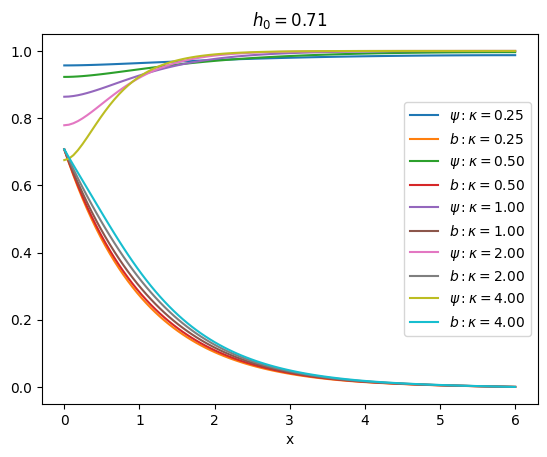

In [79]:
# basic usage vacuum boundary at $x=0$.

h0=1/2**(1/2)
a,ba,ra=0,h0,0
b,bb,rb=6,0,0

for k in range(-2,3):
  kappa=2**k
  glplot(kappa,(a,ba,ra),(b,bb,rb),f"\kappa={kappa:.2f}")
plt.xlabel("x")
plt.title(f"$h_0={h0:.2f}$")
plt.legend()
plt.show()

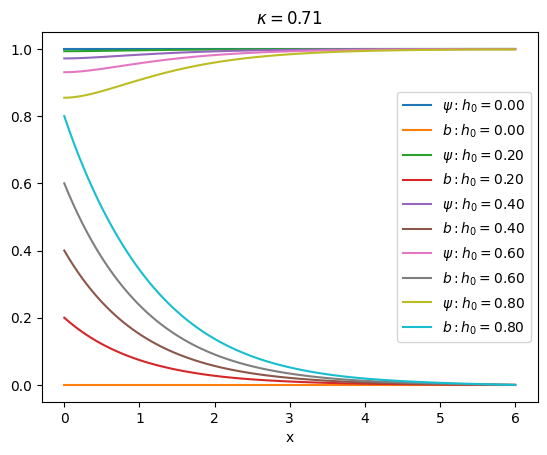

In [84]:
# basic usage vacuum boundary at $x=0$.

kappa=1/2**(1/2)
b,bb,rb=6,0,0
N=5
for k in range(N):
  h0=k/N
  glplot(kappa,(0,h0,0),(b,bb,rb),f"h_0={h0:.2f}")
plt.xlabel("x")
plt.title(f"$\kappa={kappa:.2f}$")
plt.legend()
plt.show()